# Explore Annual Maximum daily Precipitation in Brazil

To be defined

In [ ]:
#| echo: false
#| warning: false

library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Carregando pacotes exigidos: knitr

O código abaixo lê o arquivo original gerado pelo Eng. Saulo Aires de Souza, que contém os valores das precipitações máximas diárias e respectivos anos. Esse código só deve ser gerado de novo caso um novo arquivo original seja atualizado. Caso contrário, deve-se utilizar o arquivo RDS contido no diretório.

In [ ]:
#| label: generate-main-dataframe
#| echo: true
#| eval: false
#| warning: false
# Code written by Thiago Lappicy with comments by Dirceu Reis

# Extract metadata only (first 15 lines)
Pd_metadata <-
  read.csv("DADOS_CONV_SAULO.dat", header = FALSE, sep = ";",
           nrows = 15, dec = ".",na.strings = "null",
           fileEncoding = "latin1") #,
           #colClasses = c("integer",
          #                "integer","integer","numeric",
           #               "numeric", "numeric","numeric",
            #              "integer","char","char",
             #             "char","char","char",
              #            "char","char"))

# Extract Dates and Annual Maximum Daily Precipitation (20th to 112nd lines)
Pd_tmp <-
  read.csv("DADOS_CONV_SAULO.dat", header = TRUE, sep = ";",
           skip = 20, dec = ".", na.strings = "null")

# Create an empty dataframe with the correct columns
Pd <- as.data.frame(matrix(data = NA, nrow = 0, ncol = 17))   

# Name the columns
colnames(Pd) <- c("Date", "Pdmax", Pd_metadata[,1])

# Combine both dataframes with only one column for "Data" and one for "Pdmax"
# Obs: the original file contains one column in excess. That is why we use 
# "to = ncol(Pd_metadata) - 1" in the function "seq" below

for(i in seq(from = 1, to = ncol(Pd_metadata) - 1, by = 2)){
  
  # Printar uma mensagem a cada 500 estações pra ter certeza que ta rodando
  if((i+1) %% 500 == 0) cat("Rodando iteração: ", i+1, "...\n")
  
  # Include the metadata contained in Pd_metadata
  # Get only the second column of station "i" and transpose the whole column
  # so it becomes a line with metadata
  metadata_proxy <- as.data.frame(t(Pd_metadata[,(i+1)])) 
  # Copy metadata to all possible observations (max.number.observations = 112)
  metadata_proxy[1:112,] <- metadata_proxy
  # Name the column
  colnames(metadata_proxy) <- Pd_metadata[,1]
  
  # Include the annual maximum daily Precip and Date (Date + Pdmax + Metadata)
  Pd[(nrow(Pd)+1):(nrow(Pd)+nrow(Pd_tmp)),] <-
    cbind(Pd_tmp[,c(i, i+1)], metadata_proxy)
  
}


# Zerar as linhas que tem valores NAs de Data E valor (2 terços +-)
# 425600 pra 156529
Pd <- Pd[-which(is.na(Pd$Pdmax) & is.na(Pd$Date)),]

Pd <- Pd %>%
    mutate( Date = as.Date(Date,"%d/%m/%Y"),
            BaciaCodigo = as.integer(BaciaCodigo),
            SubBaciaCodigo = as.integer(SubBaciaCodigo),
            Estacao_codigo = as.integer(Estacao_codigo),
            Latitude = as.numeric(Latitude),
            Longitude = as.numeric(Longitude),
            Altitude = as.numeric(Altitude))



saveRDS(Pd, "Pd.rds")

rm(metadata_proxy)
rm(Pd_metadata)
rm(Pd_tmp)

In [ ]:
#| label: gera-resumo-dados
#| echo: true

# Load the data
Pd <- readRDS("Pd.rds")

# Create a new column with the year of the observation right after the date
Pd <- Pd %>% mutate(Ano = year(Date), .after = Date)

n_stations_year <- Pd %>% 
  count(Ano)

n_stations_year_bacia <- Pd %>% 
  count(Ano,BaciaCodigo)

record_length_station <- Pd %>% #select(c(4,6:8)) %>%
  group_by(Estacao_codigo,BaciaCodigo) %>%
  summarise(n = n())

`summarise()` has grouped output by 'Estacao_codigo'. You can override using
the `.groups` argument.

Criando uma Tabela para o resumo do tamanho das séries

In [ ]:
#| label: tbl-record-length-statistics
#| tbl-cap: "Resumo das estatísticas do tamanho das séries históricas das estações Plu por bacia hidrográfica"
#| tab-alt: "Resumo estatístico"
#| echo: false
#| output: true

# Create a display table showing ten of
# the largest islands in the world
gt_tbl <- gt(Tab_resumo_RL,rowname_col = "BaciaCodigo") %>%
    tab_header(
    title = "Resumo estatístico do tamanho das séries históricas",
    subtitle = "Informação por bacia hidrográfica"
  ) %>%
  tab_source_note(
    source_note = "Fonte dos dados: Hidroweb da ANA (2023)."
  ) %>%
   tab_stubhead(label = "Bacia") %>%
  tab_spanner(
    label = "Tamanho da série (n)",
    columns = c(min, Q10, Q25, median, Q75, Q90, max, media)
  ) %>%
   cols_label(
    Q10 = html("n<sub>10</sub>"),
    Q25 = html("n<sub>25</sub>"),
    median = html("n<sub>median</sub>"),
    Q75 = html("n<sub>75</sub>"),
    Q90 = html("n<sub>90</sub>")
   )
    
    
# Show the gt Table
gt_tbl

Resumo estatístico do tamanho das séries históricas 
 
 
 Informação por bacia hidrográfica 
 
 
 
 
 Bacia 
 
 Tamanho da série (n) 
 
 
 
 min 
 n 10 
 n 25 
 n median 
 n 75 
 n 90 
 max 
 media 
 
 
 
 1 
 15 
 18 
 21 
 26 
 33 
 37 
 51 
 27.19817 
 2 
 15 
 21 
 29 
 38 
 41 
 45 
 67 
 35.14054 
 3 
 15 
 17 
 23 
 31 
 47 
 79 
 108 
 38.93572 
 4 
 15 
 19 
 31 
 42 
 57 
 72 
 93 
 44.27381 
 5 
 15 
 26 
 37 
 52 
 67 
 74 
 86 
 51.44072 
 6 
 15 
 27 
 34 
 39 
 48 
 63 
 112 
 41.92023 
 7 
 15 
 21 
 30 
 38 
 51 
 61 
 74 
 40.20000 
 8 
 15 
 27 
 33 
 42 
 59 
 70 
 84 
 46.01111 
 
 
 
 Fonte dos dados: Hidroweb da ANA (2023).

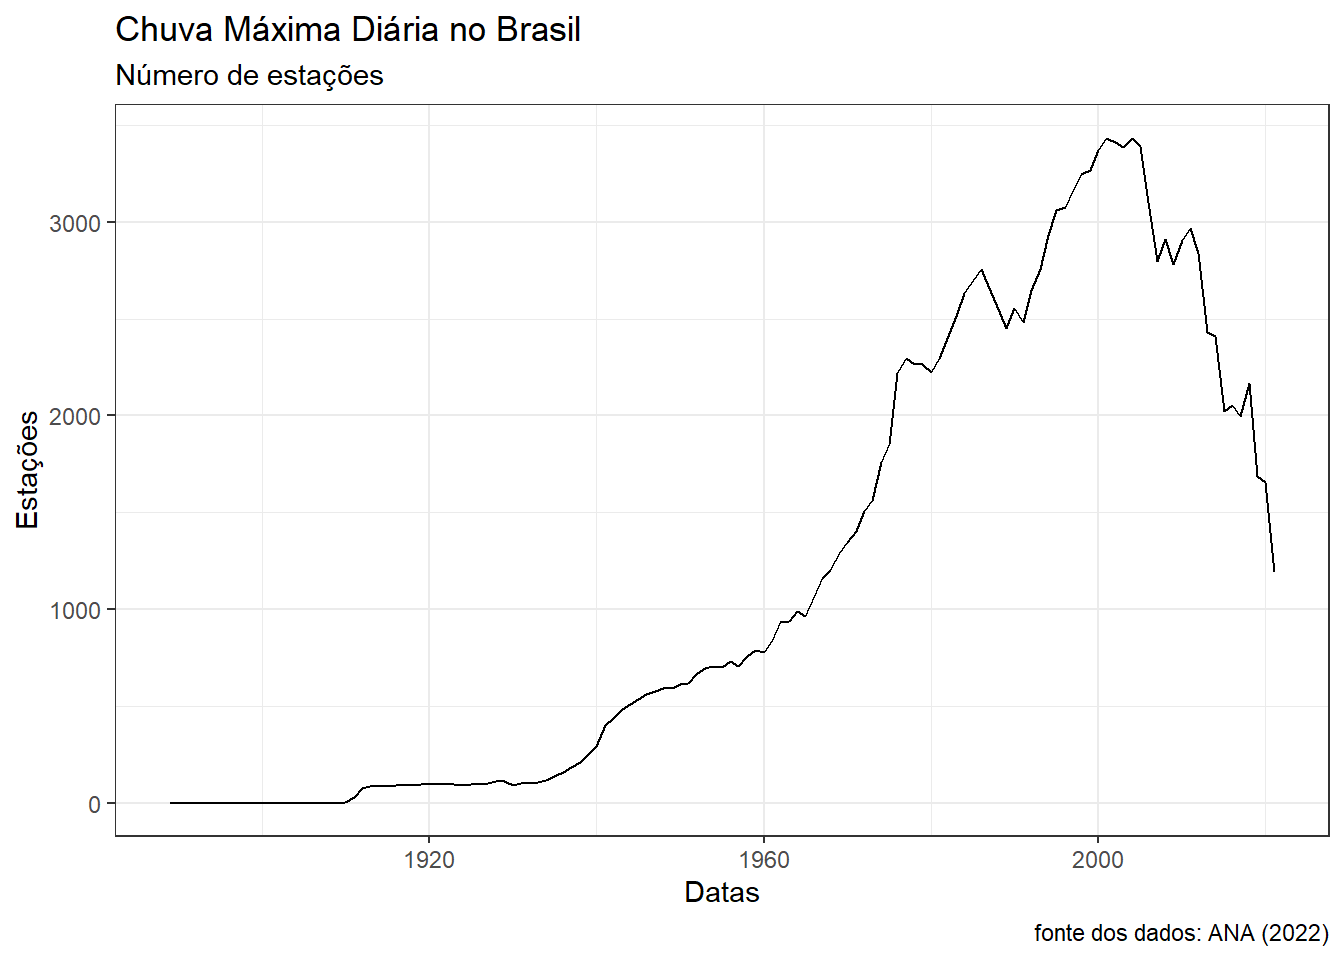

In [ ]:
#| label: fig-number-stations
#| fig-cap: "Número de estações Plu no Brasil"
#| fig-alt: "Estações Plu no Brasil com disponibilidade de chuvas diárias."

# Criação de plotagem do número de estações com valores diários de precipitação
# ao longo dos anos.

ggplot() +
  geom_line(data = n_stations_year,aes(Ano,n),colour = 'black', linewidth = 1) +
   labs(title = "Chuva Máxima Diária no Brasil", subtitle = "Número de estações",
       caption = "fonte dos dados: ANA (2022)",
       x = "Datas", y = "Estações") +
  theme_bw()

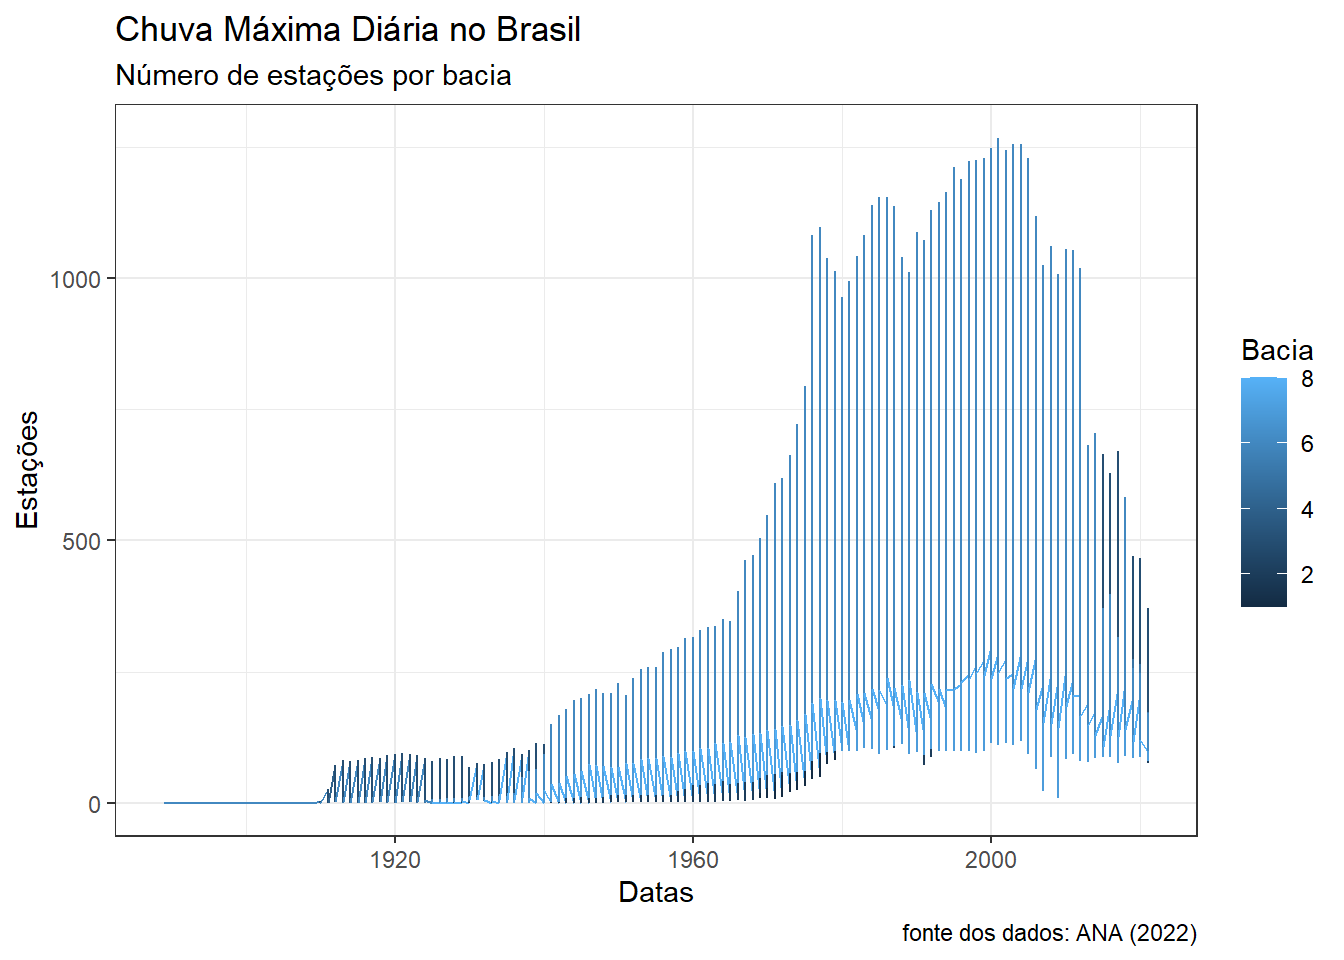

In [ ]:
#| label: fig-number-stations-bacia
#| fig-cap: "Número de estações Plu no Brasil por Bacia"
#| fig-alt: "Estações Plu no Brasil com disponibilidade de chuvas diárias."

# Criação de plotagem do número de estações, por bacia hidrográfica, com valores
# diários de precipitação ao longo dos anos.

ggplot() +
  geom_line(data = n_stations_year_bacia,aes(Ano,n,col = BaciaCodigo), linewidth = 1) +
   labs(title = "Chuva Máxima Diária no Brasil", subtitle = "Número de estações por bacia",
       caption = "fonte dos dados: ANA (2022)",
       x = "Datas", y = "Estações", col = "Bacia") +
  theme_bw()

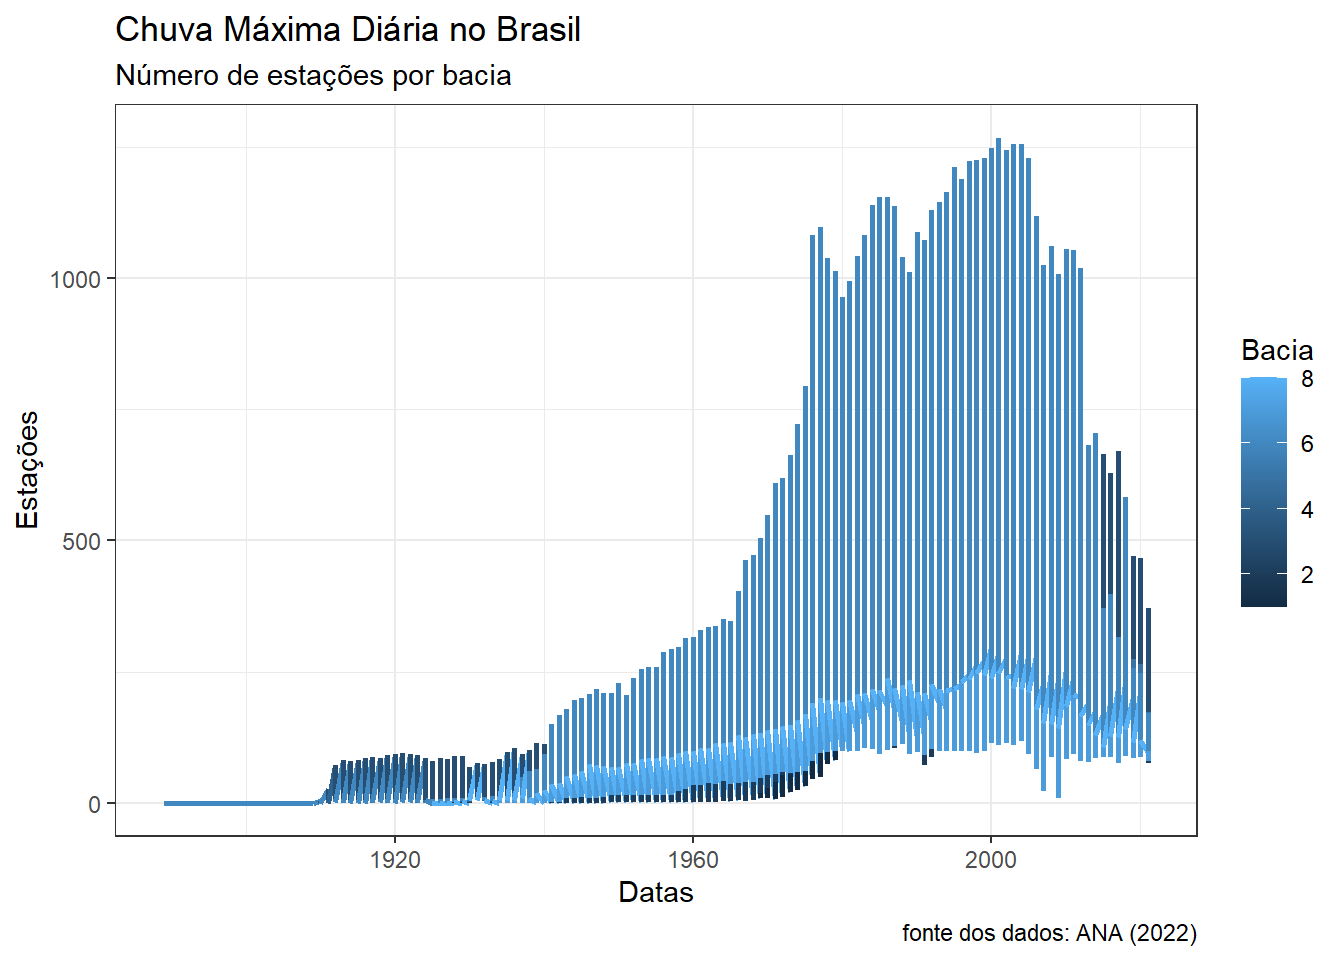

In [ ]:
#| label: fig-cdf_record-length
#| fig-cap: "Distribuição de probabilidades acumuladas do tamanho de séries históricas das estações pluviométricas no Brasil"
#| fig-alt: "Estações Plu no Brasil com disponibilidade de chuvas diárias."

# Criação de plotagem do número de estações, por bacia hidrográfica, com valores
# diários de precipitação ao longo dos anos.

ggplot() +
  geom_line(data = n_stations_year_bacia,aes(Ano,n,col = BaciaCodigo), size = 1) +
   labs(title = "Chuva Máxima Diária no Brasil", subtitle = "Número de estações por bacia",
       caption = "fonte dos dados: ANA (2022)",
       x = "Datas", y = "Estações", col = "Bacia") +
  theme_bw()